<h1 align="center"> Project: Sentiment Analysis and Correlation Analysis</h1>

# Introduction
This project focuses on the detailed analysis of a large corpus of financial news data to discover correlations between news sentiment and stock market movements. The dataset for this project is FNSPID (Financial News and Stock Price Integration Dataset). It is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

To conduct this project, I will use two datasets: one provided by 10 academy (raw_analyst_ratings.csv) and the other financial data downloaded using the `yfinance` library. I will utilize various Python modules to perform this analysis.

In [1]:
# import reqiuared libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Data Gathering 

In [2]:
stock_df = pd.read_csv("../data/raw_analyst_ratings.csv")

# Assessing Data

## Visual Assessement

In [3]:
stock_df

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


There is one unnecessary column named "Unnamed: 0

## Programmatic Assessement

In [4]:
stock_df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [5]:
stock_df.duplicated().sum()

0

In [6]:
stock_df.dtypes

Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

The `date` column contains an erroneous data type.

## Quality issues
1. There is one unnecessary column named `Unnamed: 0`.
2. The `date` column contains an erroneous data type.

# Data Cleaning
## Quality issues

In [7]:
# make copy
stock_df_copy = stock_df.copy()

### Issue #1
There is one unnecessary column named Unnamed: 0

### Define
Unnamed:0 column is unnecessary for my analysis, so I use pandas `drop` method to remove this column from the data. 

### Code

In [8]:
stock_df_copy.drop('Unnamed: 0', axis=1, inplace=True)

### Test

In [9]:
stock_df_copy.columns

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

### Issue #2
The date column contains an erroneous data type.

### Define
The date column is an object data type but it should be datetime data type, I use `to_datetime` pandas method to convert the object type into datetime.

### Code

In [10]:
#remove -4:00 from the dataset
stock_df_copy['date']=stock_df_copy['date'].str.rstrip('-04:00')

# convert data type and format
stock_df_copy['date'] = pd.to_datetime(stock_df_copy.date, format='mixed', errors='coerce').dt.strftime('%Y-%m-%d')
stock_df_copy['date'] = pd.to_datetime(stock_df_copy.date)

In [11]:
stock_df_copy.dropna(inplace=True)

### Test

In [12]:
stock_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407287 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   headline   1407287 non-null  object        
 1   url        1407287 non-null  object        
 2   publisher  1407287 non-null  object        
 3   date       1407287 non-null  datetime64[ns]
 4   stock      1407287 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 64.4+ MB


# Analysis and Visualization

## Descriptive Statistics
1. Obtain basic statistics for textual lengths (like headline length).


In [13]:
# Calculate the average headline length
average_headline_length = stock_df_copy['headline'].str.len().mean()
print("Average Headline Length: {:.2f}".format(average_headline_length))

Average Headline Length: 73.12


The average headline length is `73.12`.

2. Count the number of articles per publisher to identify which publishers are most active.

In [14]:
# Count articles per publisher
stock_df_copy['publisher'].value_counts()

publisher
Paul Quintaro                      228372
Lisa Levin                         186975
Benzinga Newsdesk                  150476
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

Text(0, 0.5, 'Number of Articles')

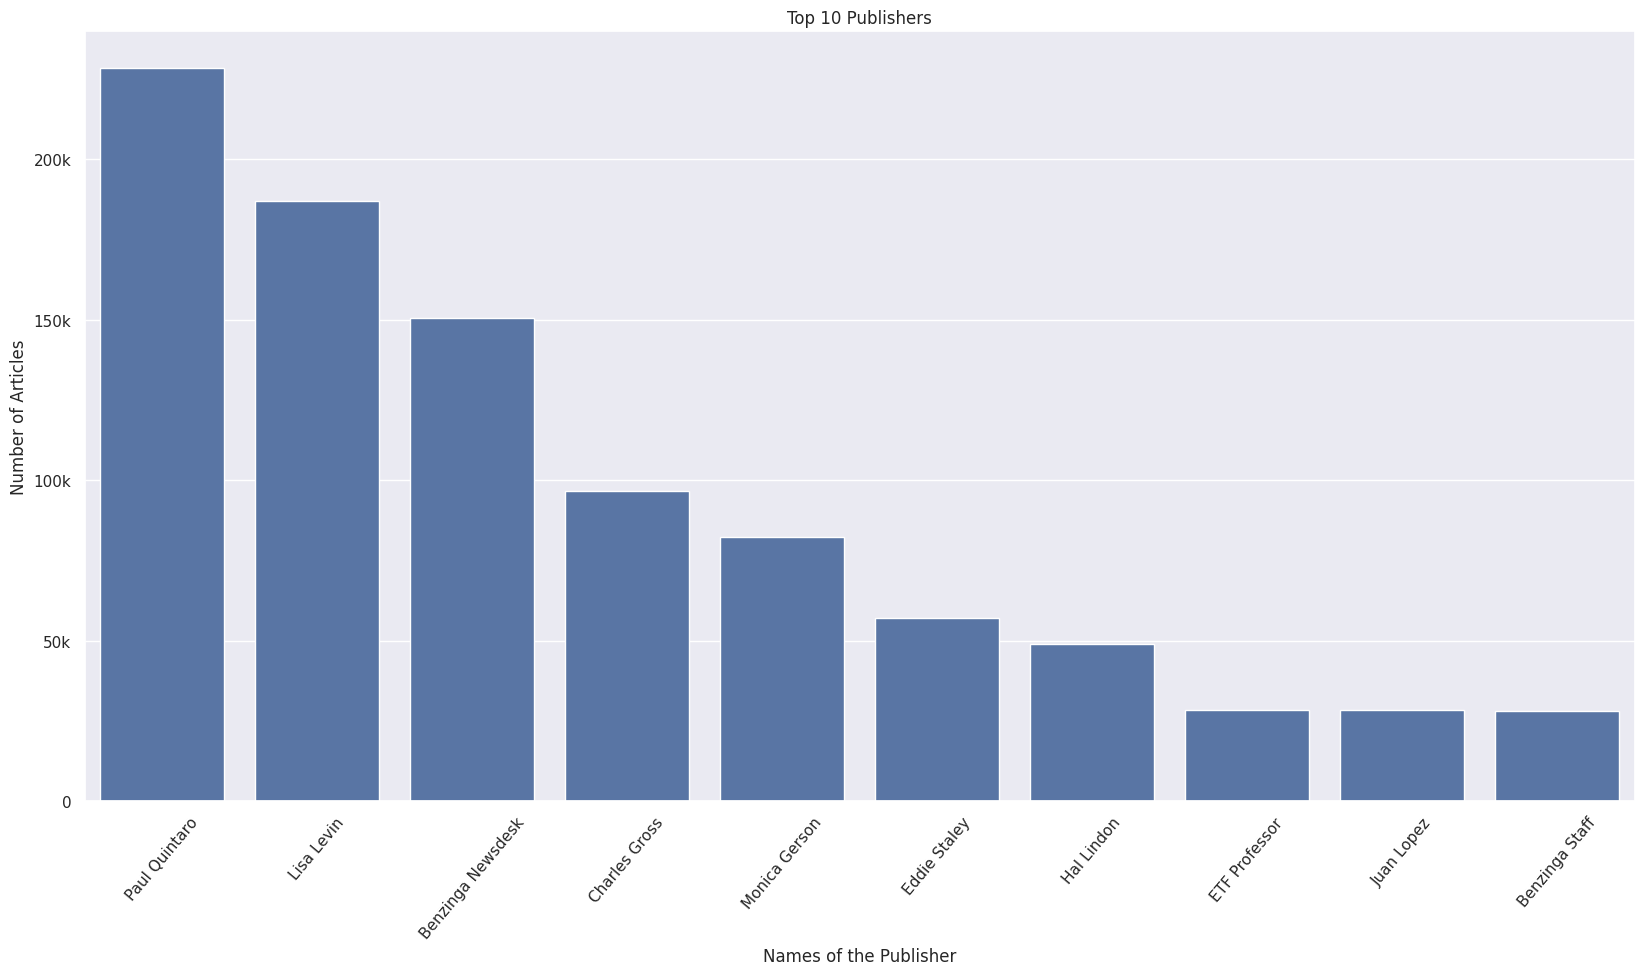

In [91]:
# plot top 10 publishers
df = stock_df['publisher'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x = 'publisher', y = 'count', data=df)
plt.title('Top 10 Publishers')
plt.xlabel('Names of the Publisher')
plt.xticks(rotation=50)
plt.yticks([0, 50000, 100000, 150000, 200000], [0, '50k', '100k', '150k', '200k'])
plt.ylabel('Number of Articles')

The above bar plot shows the top 10 publishers based on the dataset. Paul Quintaro has the highest count at 228,372, suggesting he is the most prolific publisher among the listed ones, contributing significantly to the dataset. Lisa Levin follows with a count of 186,975, making her the second most prolific publisher, indicating a substantial presence in the dataset. Benzinga Newsdesk comes in third with a count of 150,476, further highlighting its significant contribution.


3. Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

In [16]:
df = stock_df_copy.copy()
df = df.set_index(pd.DatetimeIndex(df['date']))
df1 = df.resample('YE').size()

Text(0, 0.5, 'Number of Articles')

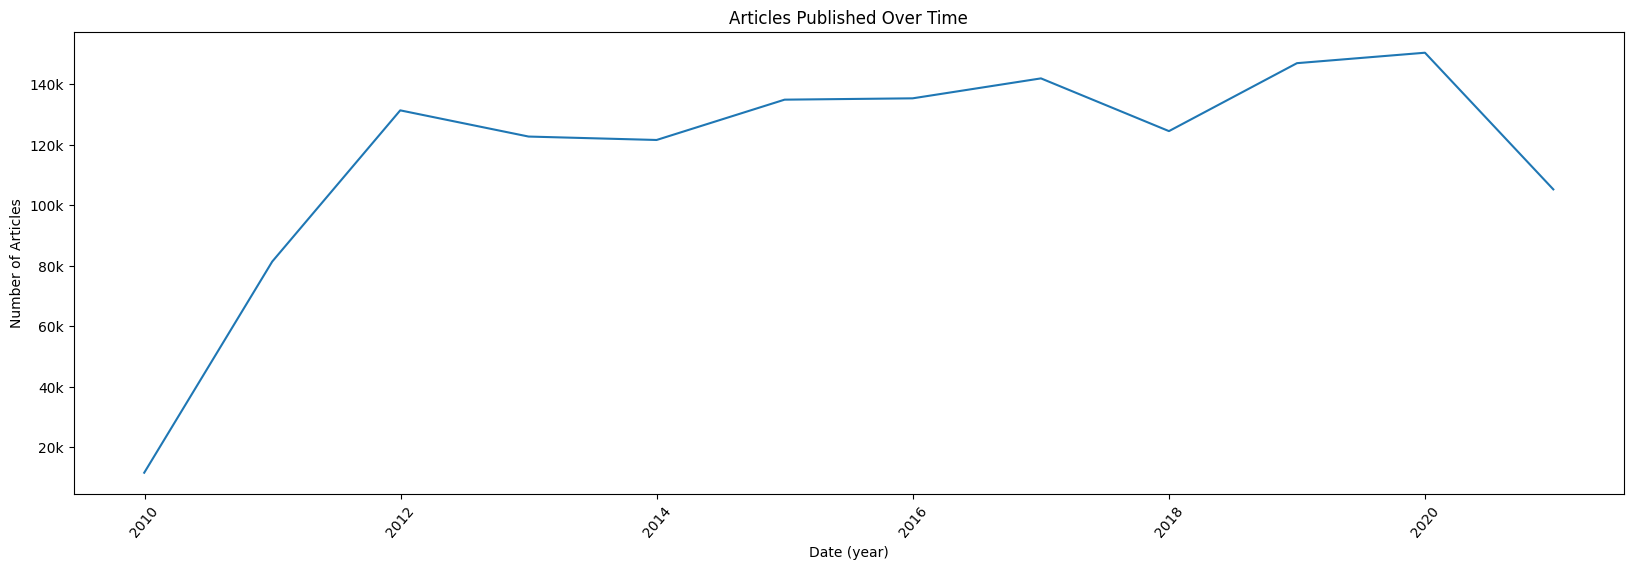

In [17]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df1)
sns.set(style='darkgrid')
plt.title('Articles Published Over Time')
plt.xlabel('Date (year)')
plt.xticks(rotation=50)
plt.yticks([20000, 40000, 60000, 80000, 100000, 120000, 140000], ['20k', '40k','60k', '80k', '100k', '120k', '140k'])
plt.ylabel('Number of Articles')

As can be seen from the above line plot, the publication rate appears flat from 2012 to 2017, indicating a period of relative consistency. The frequency of publications decreased between 2017 and 2018. After 2018, there is a significant increase in the number of publications. The year 2020 shows the highest frequency of publications.

## Text Analysis(Sentiment analysis & Topic Modeling)
1. Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.

2. Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

## Time Series Analysis:
1. How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.

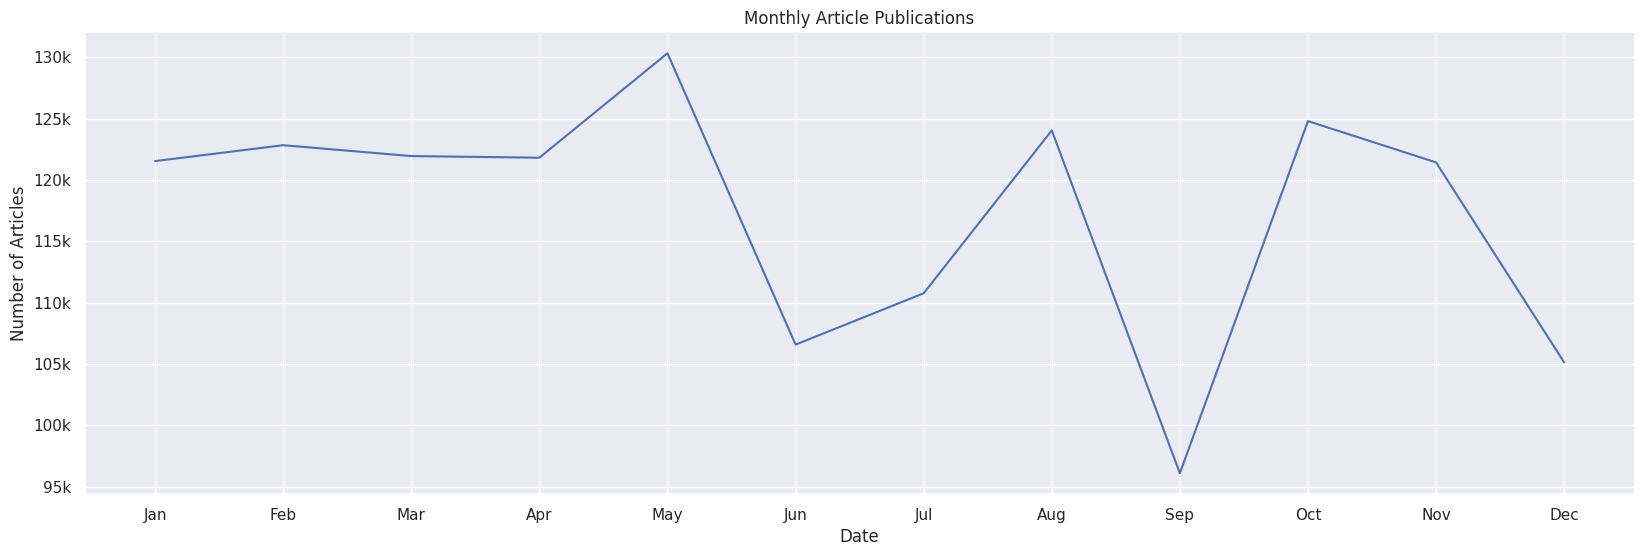

In [46]:
# Group by date and count articles
monthly_articles = stock_df_copy.groupby(stock_df_copy['date'].dt.month).size()
# Define the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting monthly articles
plt.figure(figsize=(20, 6))
monthly_articles.plot(kind='line')
plt.title('Monthly Article Publications')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(np.arange(1, 13), months)
plt.yticks([95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000], ['95k','100k', '105k', '110k', '115k', '120k', '125k', '130k'])
plt.show()

The results of a line plot that shows publication trends over several months. 
- May: There's a significant spike in publications, indicating a much higher number compared to other months.
- September: Publication numbers dip considerably, showing the lowest point on the line.
- January to April: The line seems relatively flat, suggesting a consistent and stable number of publications throughout these months.

## Publisher Analysis:
1. Which publishers contribute most to the news feed? Is there a difference in the type of news they report?
2. If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.

In [76]:
#stock_df_copy['domain'] = stock_df_copy['publisher'].str.extract(r'@(\w+)', expand=False)

# Counting unique publishers
unique_domains = stock_df_copy['publisher'].nunique()
print(f"Number of Unique Domains: {unique_domains}")

Number of Unique Domains: 1034


Text(0.5, 0, 'Number of Articles')

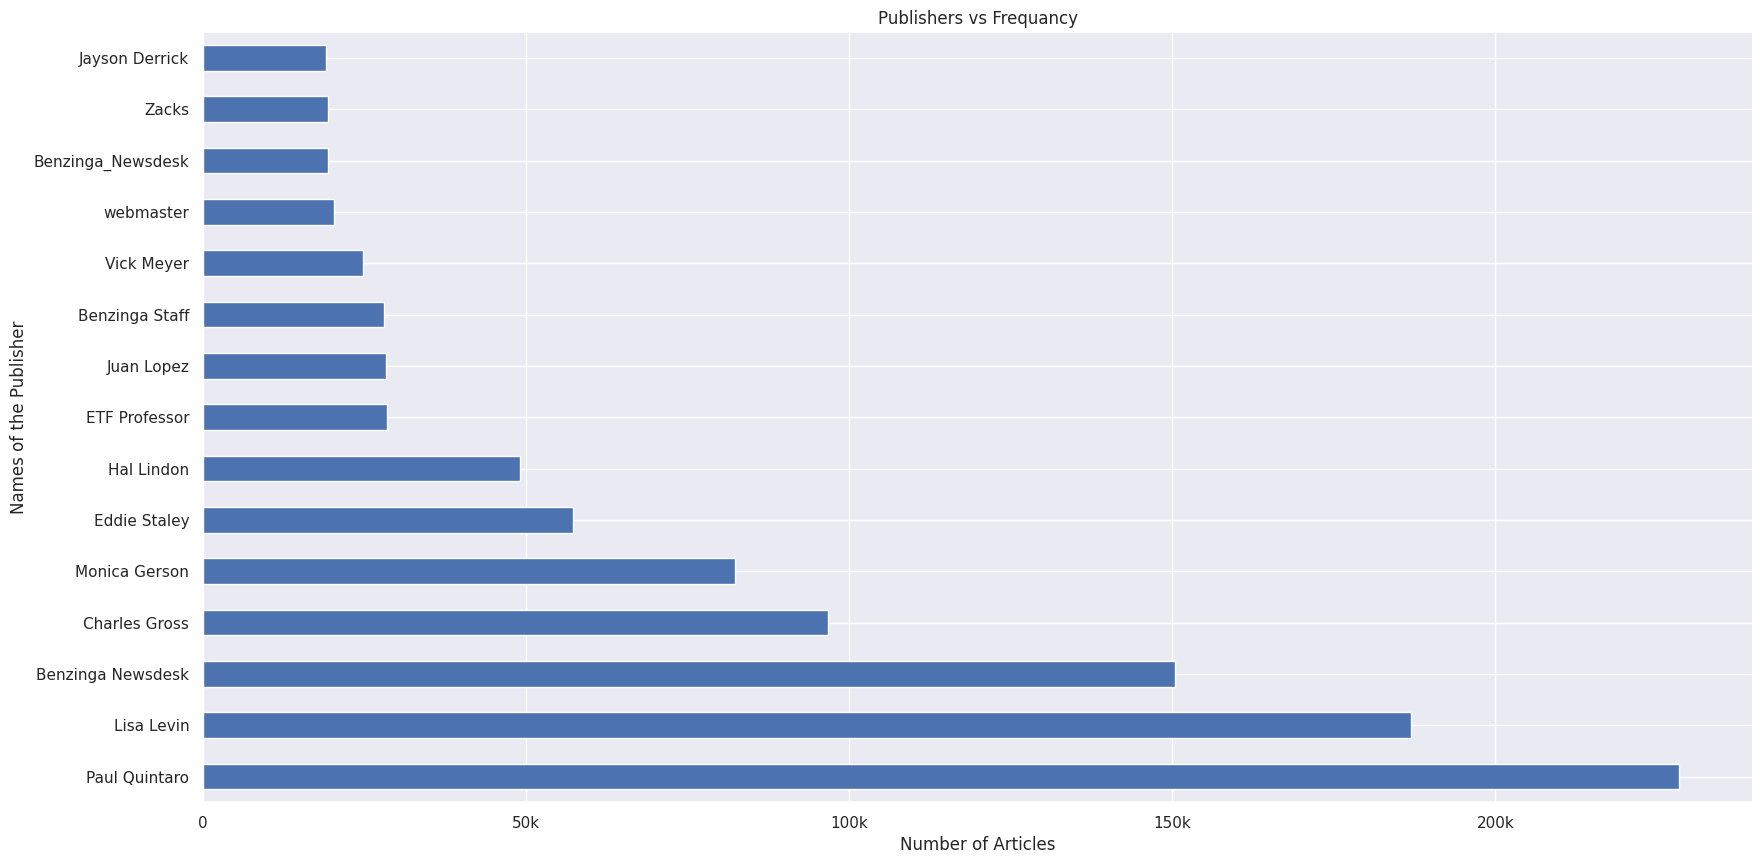

In [88]:
# Analyzing contributions of publisher
#contributions_by_domain = stock_df_copy['publisher'].value_counts()
#print(contributions_by_domain)
plt.figure(figsize=(20, 10))
stock_df_copy['publisher'].value_counts()[:15].plot(kind='barh')
plt.title('Publishers vs Frequancy')
plt.ylabel('Names of the Publisher')
plt.xticks([0, 50000, 100000, 150000, 200000], [0, '50k', '100k', '150k', '200k'])
plt.xlabel('Number of Articles')

The bar plot indicates that Paul Quinto published a greater number of articles than the other publishers.

In [89]:
x = stock_df_copy['publisher'].value_counts().reset_index()
# Extracting domain from email addresses
if '@' in x['publisher']:
    x['domain'] = x['publisher'].str.extract(r'@([A-Za-z0-9.-]+)\.')
else:
    x['domain'] = x['publisher']